In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
train_modified = pd.read_csv('train_modified.csv')

In [3]:
train_modified.fillna(train_modified.mean(),inplace = True)
train_modified.isnull().any()

Semana                       False
Agencia_ID                   False
Canal_ID                     False
Ruta_SAK                     False
Cliente_ID                   False
Producto_ID                  False
Client_Type                  False
Producto_name                False
weight                       False
pieces                       False
weight_per_piece             False
Demanda_uni_equil            False
Demanda_uni_equil_tminus1    False
Demanda_uni_equil_tminus2    False
Demanda_uni_equil_tminus3    False
Demanda_uni_equil_tminus4    False
Demanda_uni_equil_tminus5    False
Agencia_ID_count             False
Canal_ID_count               False
Ruta_SAK_count               False
Cliente_ID_count             False
Producto_ID_count            False
Client_Type_count            False
dtype: bool

In [4]:
train_modified[:5]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Client_Type,Producto_name,weight,pieces,...,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,Client_Type_count
0,6,1110,7,3301,73589,1212,8,428,120.0,2.0,...,0.0,0.0,0.0,0.0,6726.222,81297.336,3480.2222,12.111111,144403.0,3848448.800
1,6,1110,7,3301,73844,1212,11,428,120.0,2.0,...,2.0,2.0,0.0,0.0,6726.222,81297.336,3480.2222,7.750000,144403.0,17455.111
2,6,1110,7,3301,818913,1212,8,428,120.0,2.0,...,0.0,0.0,0.0,0.0,6726.222,81297.336,3480.2222,10.625000,144403.0,3848448.800
3,6,1110,7,3301,988589,1212,8,428,120.0,2.0,...,0.0,0.0,0.0,0.0,6726.222,81297.336,3480.2222,16.444445,144403.0,3848448.800
4,6,1110,7,3301,1159580,1212,11,428,120.0,2.0,...,3.0,3.0,0.0,0.0,6726.222,81297.336,3480.2222,19.444445,144403.0,17455.111


In [5]:
train_modified.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Client_Type', 'Producto_name', 'weight', 'pieces',
       'weight_per_piece', 'Demanda_uni_equil', 'Demanda_uni_equil_tminus1',
       'Demanda_uni_equil_tminus2', 'Demanda_uni_equil_tminus3',
       'Demanda_uni_equil_tminus4', 'Demanda_uni_equil_tminus5',
       'Agencia_ID_count', 'Canal_ID_count', 'Ruta_SAK_count',
       'Cliente_ID_count', 'Producto_ID_count', 'Client_Type_count'],
      dtype='object')

In [6]:
X = train_modified.drop(columns = ['Demanda_uni_equil'])
Y = train_modified['Demanda_uni_equil']


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.25,random_state = 1)

In [8]:
def RMSLE(actuals, predictions):
    """ Takes true values and predictions. Returns their Root Mean Squared Logarithmic Error.
    """
    result = 0.0
    actuals = np.asarray(actuals) * 1.0
    predictions = np.asarray(predictions)
    if(len(actuals) == len(predictions)):
        result = np.sqrt(sum(((np.log(predictions + 1.0) - np.log(actuals + 1.0)) ** 2) / len(actuals)))
        return result
    else: 
        return "Error!"
    

In [9]:
#MinMaxScaler().fit(X_trian)
X_train_scaled = MinMaxScaler().fit(X_train).transform(X_train)
X_test_scaled = MinMaxScaler().fit(X_test).transform(X_test)

In [ ]:
n_estimators = [50,100,150]
depth_value = [5,10,15,20]
alpha = [0.2,0.3,0.4]

from sklearn.metrics import make_scorer
scorer = make_scorer(RMSLE,greater_is_better = False)

param_grid = dict(n_estimators = n_estimators,max_depth = depth_value,learning_rate = alpha)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
grid_search = GridSearchCV(XGBRegressor(objective ='reg:squarederror'),param_grid,cv = kfold,scoring = scorer)
grid_result = grid_search.fit(X_train_scaled,Y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

[14:19:07] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[15:04:52] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[15:47:41] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[16:31:07] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[17:14:30] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_meth

[07:06:06] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[09:41:36] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [120]:
xgbmodel = XGBRegressor(objective ='reg:squarederror',n_estimaors = 30,max_depth=10,learning_rate=0.1).fit(X_train_scaled,Y_train)
prediction = xgbmodel.predict(X_test_scaled)
prediction_pos = np.where(prediction<0,0,prediction)
score = RMSLE(Y_test,prediction)
score

0.6545525718437913

array([  0.46735942,   0.53403944,   0.54673797, ...,  77.326584  ,
       191.1983    , 191.24736   ], dtype=float32)

# Feature Importance

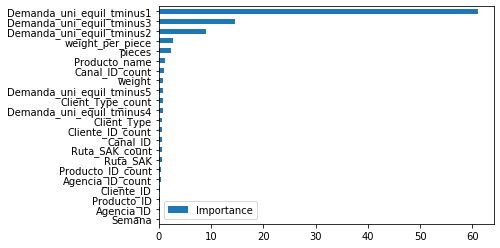

In [92]:
importance = pd.DataFrame({'Importance':xgbmodel.feature_importances_*100}, index = X.columns)
importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh')

Thresh = 0.610,n = 1, RMSLE:0.7922
Thresh = 0.147,n = 2, RMSLE:0.7688
Thresh = 0.091,n = 3, RMSLE:0.7848
Thresh = 0.028,n = 4, RMSLE:0.7390
Thresh = 0.023,n = 5, RMSLE:0.7238
Thresh = 0.011,n = 6, RMSLE:0.7057
Thresh = 0.010,n = 7, RMSLE:0.6986
Thresh = 0.009,n = 8, RMSLE:0.6796
Thresh = 0.008,n = 9, RMSLE:0.6711
Thresh = 0.008,n = 10, RMSLE:0.6661
Thresh = 0.008,n = 11, RMSLE:0.6788
Thresh = 0.007,n = 12, RMSLE:0.6783
Thresh = 0.006,n = 13, RMSLE:0.6690
Thresh = 0.006,n = 14, RMSLE:0.6690
Thresh = 0.006,n = 15, RMSLE:0.6678
Thresh = 0.005,n = 16, RMSLE:0.6705
Thresh = 0.005,n = 17, RMSLE:0.6671
Thresh = 0.004,n = 18, RMSLE:0.6631
Thresh = 0.003,n = 19, RMSLE:0.6618
Thresh = 0.003,n = 20, RMSLE:0.6627
Thresh = 0.003,n = 21, RMSLE:0.6614
Thresh = 0.001,n = 22, RMSLE:0.6614


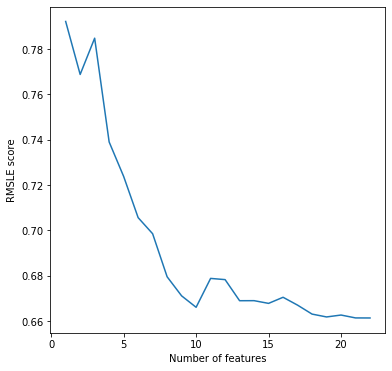

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
thresholds = sorted(xgbmodel.feature_importances_,reverse=True)
RMSLElist =[]
nlist =[]
for thresh in thresholds:
    selection = SelectFromModel(xgbmodel,threshold = thresh, prefit = True)
    X_train_selected = selection.transform(X_train_scaled)
    X_test_selected = selection.transform(X_test_scaled)
    
    model2 = XGBRegressor(objective ='reg:squarederror')
    model2.fit(X_train_selected,Y_train)
    
    pred = model2.predict(X_test_selected)
    pred = np.where(pred<0,0,pred)
    RMSLE_score = RMSLE(Y_test,pred)
    mse = mean_squared_error(Y_test,pred)
    n_features = X_train_selected.shape[1]
    print ('Thresh = %.3f,n = %d, RMSLE:%.4f' % (thresh, n_features,RMSLE_score))
    RMSLElist.append(RMSLE_score)
    nlist.append(n_features)

pyplot.figure(figsize=(6,6))
pyplot.xlabel('Number of features')
pyplot.ylabel('RMSLE score')
pyplot.plot(nlist,RMSLElist)
pyplot.show()

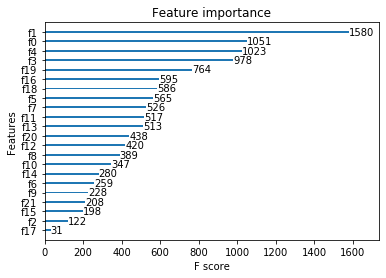

In [63]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgbmodel)
pyplot.grid()

In [65]:
from sklearn.feature_selection import SelectFromModel
selection = SelectionFromModel(xgbmodel,threshold=)

array([[6.66666667e-01, 6.16252181e-02, 0.00000000e+00, ...,
        6.36386486e-04, 2.99713970e-01, 1.00000000e+00],
       [1.00000000e+00, 4.48699744e-02, 0.00000000e+00, ...,
        1.99795769e-04, 5.83819612e-02, 4.19556601e-01],
       [0.00000000e+00, 2.83987180e-04, 0.00000000e+00, ...,
        1.39857038e-03, 3.82854734e-01, 1.00000000e+00],
       ...,
       [6.66666667e-01, 2.38143535e-02, 0.00000000e+00, ...,
        1.51696796e-03, 8.81657382e-01, 5.98509358e-02],
       [6.66666667e-01, 1.71609396e-02, 0.00000000e+00, ...,
        1.45036937e-03, 4.51364262e-02, 4.87022324e-01],
       [0.00000000e+00, 2.10150513e-02, 0.00000000e+00, ...,
        6.08901448e-04, 2.33189184e-01, 4.19556601e-01]])

In [83]:
train_modified.fillna(train_modified.mean(),inplace = True)
train_modified.isnull().any()

Semana                       False
Agencia_ID                   False
Canal_ID                     False
Ruta_SAK                     False
Cliente_ID                   False
Producto_ID                  False
Client_Type                  False
Producto_name                False
weight                       False
pieces                       False
weight_per_piece             False
Demanda_uni_equil            False
Demanda_uni_equil_tminus1    False
Demanda_uni_equil_tminus2    False
Demanda_uni_equil_tminus3    False
Demanda_uni_equil_tminus4    False
Demanda_uni_equil_tminus5    False
Agencia_ID_count             False
Canal_ID_count               False
Ruta_SAK_count               False
Cliente_ID_count             False
Producto_ID_count            False
Client_Type_count            False
dtype: bool

In [110]:
# 1. 
# 2. scaled只对numerical，id feature取出
# 3. 新产品
# 4. 


In [115]:
aaa = pred.sort()
aaa

In [123]:
np.sort(pred)

array([  0.       ,   0.       ,   1.2511872, ..., 105.32796  ,
       203.14882  , 236.9712   ], dtype=float32)

In [117]:
np.sort(Y_test)

array([   0,    0,    0, ...,  425,  601, 2184])

In [118]:
np.sort(Y_train)

array([  0,   0,   0, ..., 192, 336, 360])